In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Add, Activation, Conv1D, Conv2D, Flatten
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
import numpy as np

2024-01-14 18:20:48.522540: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-14 18:20:48.522688: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-14 18:20:48.568930: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-14 18:20:48.667277: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-14 18:20:49.817007: W tensorflow/compiler/tf2

In [2]:
dataset_npz = np.load('dataset_immagini.npz')

# estrai immagini ed etichette
immagini = dataset_npz['immagini']
etichette = dataset_npz['etichette']

In [3]:
# creadataset 

dataset = tf.data.Dataset.from_tensor_slices((immagini, etichette))

2024-01-14 18:20:53.192125: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-14 18:20:53.468519: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-14 18:20:53.468867: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
images_train, images_test, label_train, label_test = train_test_split(immagini, etichette, test_size=0.2, random_state=42)

In [5]:
print(images_train.shape)

(9, 28, 28, 3)


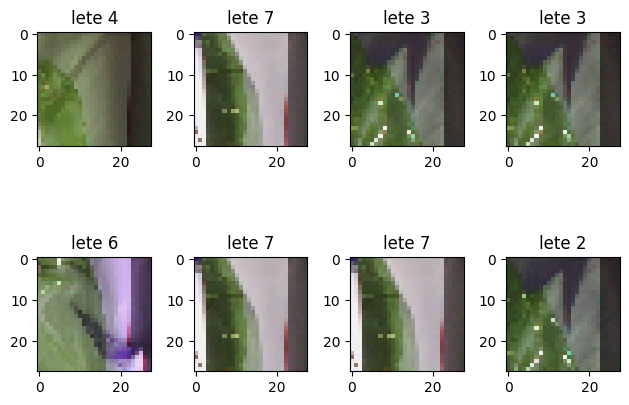

In [7]:
# stampa le prime 10 immagini
import random


width = images_train.shape[1] # 28
height = images_train.shape[2] # 28
rows = 2
cols = 4
axes = []
fig = plt.figure()

for a in range(rows * cols):
    n = random.randrange(images_train.shape[0])
    b = images_train[n]
    e = etichette[n]
    axes.append(fig.add_subplot(rows, cols, a + 1))
    subplot_title = f"{e} {str(n)}"
    axes[-1].set_title(subplot_title)
    plt.imshow(b)
fig.tight_layout()
plt.show()